## Machine Learning Model Development

### Installing Packages

In [1151]:
# Install all packages for this script
%pip install numpy pandas skimpy matplotlib scikit-learn seaborn plotly shap xgboost imblearn graphviz lightgbm lime

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\ggrys\appdata\local\programs\python\python312\lib\site-packages (1.26.4)
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 487.6 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/275.7 kB 901.1 kB/s eta 0:00:01
     ----------------------------------- -- 256.0/275.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Libraries

In [1092]:
# Import Libraries for Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.impute import SimpleImputer
from skimpy import skim

### Upload Dataset

In [1093]:
# Load dataset
df_ml = pd.read_csv("df_ml.csv")

# Load the data types mapping
with open("dtypes_dict.json", "r") as file:
    dtypes_dict = json.load(file)

# Apply correct data types
for col, dtype in dtypes_dict.items():
    if dtype == "boolean":
        df_ml[col] = df_ml[col].astype(bool)
    elif isinstance(dtype, dict) and dtype.get("dtype") == "category":
        # Restore ordered categorical data
        df_ml[col] = pd.Categorical(df_ml[col], 
                                    categories=dtype["categories"], 
                                    ordered=dtype["ordered"])
    else:
        df_ml[col] = df_ml[col].astype(dtype)

In [1094]:
print(df_ml.dtypes)
df_ml.shape

RIDAGEYR         float64
DMDEDUC2        category
DMDHHSIZ         float64
DEPRE               bool
ALQ130           float64
ALQ142          category
FNDADI              bool
HUQ010          category
MCQ010              bool
MCQ053              bool
MCQ160A             bool
MCQ160B             bool
MCQ160C             bool
MCQ160F             bool
MCQ160P             bool
MCQ220              bool
PAD680           float64
RXQ050           float64
SLD012           float64
SLD013           float64
RIAGENDR_2.0        bool
DMDMARTZ_2.0        bool
DMDMARTZ_3.0        bool
dtype: object


(5822, 23)

In [1095]:
df_ml.sample(5)

RIDAGEYR DMDEDUC2  DMDHHSIZ  DEPRE  ALQ130 ALQ142  FNDADI HUQ010  \
2853      51.0        5       2.0  False     2.0      1   False      2   
114       29.0        3       4.0  False     2.0      1   False      1   
2185      55.0        4       1.0  False     5.0      1   False      1   
5210      49.0        5       4.0  False     0.0      0   False      3   
5657      63.0        4       2.0  False     1.0      1   False      1   

      MCQ010  MCQ053  ...  MCQ160F  MCQ160P  MCQ220  PAD680  RXQ050  SLD012  \
2853   False   False  ...    False    False   False   300.0     1.0     7.0   
114    False   False  ...    False    False   False   240.0     0.0     8.5   
2185   False   False  ...    False    False    True   180.0     0.0     5.5   
5210   False   False  ...    False    False   False   600.0     1.0     7.0   
5657   False   False  ...    False    False   False   180.0     0.0     4.0   

      SLD013  RIAGENDR_2.0  DMDMARTZ_2.0  DMDMARTZ_3.0  
2853     7.0          True         False         False  
114      8.5          True         False         False  
2185     9.0          True         False          True  
5210     8.0         False         False         False  
5657     5.0          True         False         False  

[5 rows x 23 columns]

In [1096]:
skim(df_ml)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 5822   │ │ bool        │ 13    │ │ DMDEDUC2              │                                │
│ │ Number of columns │ 23     │ │ float64     │ 7     │ │ ALQ142                │                                │
│ └───────────────────┴────────┘ │ category    │ 3     │ │ HUQ010                │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean   ┃ sd    ┃ p0         ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR         │    0 │       0 │     54 │    17 │         20 │    39 │    57 │    68 │     80 │ ▃▅▅▅▇▇  │  │
│ │ DMDHHSIZ         │    0 │       0 │    2.6 │   1.5 │          1 │     2 │     2 │     3 │      7 │ ▅▇▃▃▁▁  │  │
│ │ ALQ130           │    0 │       0 │    2.2 │   1.9 │          0 │     1 │     2 │     2 │     15 │   ▇▁▁   │  │
│ │ PAD680           │    0 │       0 │    360 │   210 │    5.4e-79 │   180 │   300 │   480 │   1400 │  ▅▇▅▂   │  │
│ │ RXQ050           │    0 │       0 │    2.3 │     2 │          0 │     0 │     2 │     4 │      5 │ ▇▃▃▃▂▆  │  │
│ │ SLD012           │    0 │       0 │    7.7 │   1.6 │          2 │     7 │     8 │   8.5 │     14 │   ▁▇▇▁  │  │
│ │ SLD013           │    0 │       0 │    8.3 │   1.7 │          2 │   7.5 │     8 │     9 │     14 │   ▁▃▇▂  │  │
│ └──────────────────┴──────┴─────────┴────────┴───────┴────────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DMDEDUC2                         │         0 │              0 │ True                  │                  5 │  │
│ │ ALQ142                           │         0 │              0 │ True                  │                  4 │  │
│ │ HUQ010                           │         0 │              0 │ True                  │                  5 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true            ┃ true rate                   ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DEPRE                                │             729 │                        0.13 │       ▇    ▁        │  │
│ │ FNDADI                               │            10

### Creating ML Models

In [1097]:
#Import ML Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [1098]:
#Creating the classifier models
'''
# Count class samples
# Count the occurrences of each class in the target variable
class_counts = df_ml['DEPRE'].value_counts()

# Extract counts dynamically
count_class_0 = class_counts.get(0, 0)  # Get count for class 0 (default to 0 if not found)
count_class_1 = class_counts.get(1, 0)  # Get count for class 1 (default to 0 if not found)

# Compute scale_pos_weight
scale_pos_weight = count_class_0 / count_class_1
print(f"Scale Pos Weight: {scale_pos_weight:.2f}")
'''
models = {
    "LR": LogisticRegression(C=0.1, penalty="l1" , solver="liblinear", class_weight="balanced"),
    "DT": DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=2, criterion='gini'),
    # "RF": RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=5 , min_samples_split=10 , max_features='log2',  class_weight='balanced'),
    # "KNN": KNeighborsClassifier(n_neighbors=3, p=1, weights="distance"),
    # "SVM_rbf": SVC(kernel='rbf', C=0.1, gamma="scale", class_weight='balanced'),
    # "GBoost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=3, subsample=1.0, colsample_bytree=1.0, learning_rate=0.3),
    "LGBM": LGBMClassifier(boosting_type="gbdt", class_weight="balanced", random_state=42),
    "ADBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm="SAMME"),
    "BAGG_DT": BaggingClassifier(n_estimators=50,
                                max_samples=0.7,  # Train on 70% of data for each model
                                max_features=0.8,  # Use 80% of features
                                random_state=42)
}

# We can iterate over the dictionary as follows:
for name, classifier in models.items():
    print("Classifier:", name, " ; Sklearn object:", classifier)

Classifier: LR  ; Sklearn object: LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Classifier: DT  ; Sklearn object: DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
Classifier: XGBoost  ; Sklearn object: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, rand

1️⃣ Regularization
Some models might be too complex, capturing noise rather than patterns. Try:
✅ For Logistic Regression (LR): Increase C (inverse of regularization strength). Try values like C=0.01 or C=0.1.
✅ For Decision Trees (DT) and Random Forests (RF):

Set max_depth (e.g., max_depth=5 or max_depth=10).
Reduce max_features (e.g., sqrt or log2).
Increase min_samples_leaf (e.g., min_samples_leaf=5).
✅ For SVM: Increase C and try different kernels ('linear' or 'poly').

2️⃣ More Data / Data Augmentation
If you have a small dataset, models are likely memorizing training data. You can:
🔹 Collect more samples if possible.
🔹 Use synthetic data via SMOTE (for class imbalance)

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

3️⃣ Feature Selection / Dimensionality Reduction
🔹 Use PCA (Principal Component Analysis) to reduce noise

from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # Adjust n_components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
🔹 Use SHAP values or feature importance to remove unimportant features.

4️⃣ Tune Hyperparameters with Cross-Validation
Run GridSearchCV or RandomizedSearchCV to find optimal parameters:

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 200]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

5️⃣ Try Different Models
Since ensemble models (RF, GB, XGB, AdaBoost) are overfitting, try:
✅ Regularized models: Ridge Regression, Lasso Regression
✅ Bagging: Reduce variance by training multiple models with different subsamples
✅ Calibrated models: Use Platt scaling or Isotonic regression to improve probability calibration

6️⃣ Improve Train-Test Splitting
Make sure your train-test split represents real-world data. Try Stratified K-Fold Cross-Validation instead of a simple train-test split:

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)

7️⃣ Ensemble the Best Models
Instead of choosing one model, combine multiple models:

from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier()),
    ('svm', SVC(probability=True))
], voting='soft')
ensemble.fit(X_train, y_train)

In [1099]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Assume df_ml is your dataset
X = df_ml.drop('DEPRE', axis=1)  # Features
y = df_ml['DEPRE']  # Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

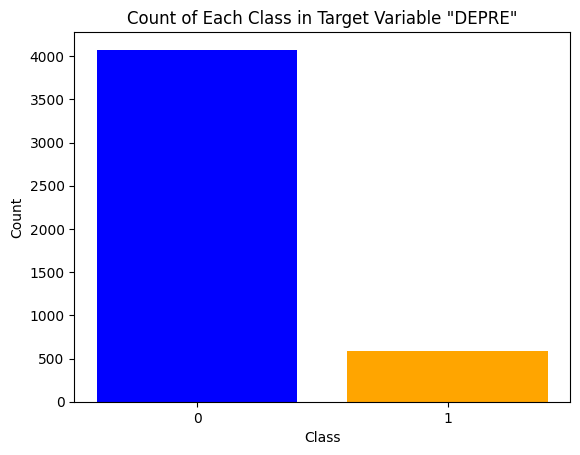

Class 0: Count = 4074, Proportion = 0.8748
Class 1: Count = 583, Proportion = 0.1252


In [1100]:
# Check the distribution of the target variable
unique_classes, class_counts = np.unique(y_train, return_counts=True)

custom_colors = ['blue', 'orange'] 

# Plot the bar chart
plt.bar(unique_classes, class_counts, color = custom_colors)

# Add title and labels
plt.title('Count of Each Class in Target Variable "DEPRE"')
plt.xlabel('Class')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

# Count the occurrences of each class
class_counts = np.bincount(y_train)

# Calculate the proportions of each class
total_instances = len(y_train)
class_proportions = class_counts / total_instances

# Print the counts and proportions
for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
    print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

### Solving Class Imbalance using Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC)

In [1101]:
# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(exclude=['object', 'category']).columns

In [1102]:
from imblearn.over_sampling import SMOTENC

# Get categorical feature indices
cat_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=cat_indices, sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

In [1103]:
skim(X_train_smote)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 8148   │ │ bool        │ 12    │ │ DMDEDUC2              │                                │
│ │ Number of columns │ 22     │ │ float64     │ 7     │ │ ALQ142                │                                │
│ └───────────────────┴────────┘ │ category    │ 3     │ │ HUQ010                │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd    ┃ p0         ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR         │    0 │      0 │     51 │    18 │         20 │     35 │    53 │    66 │     80 │ ▅▆▅▅▇▆  │  │
│ │ DMDHHSIZ         │    0 │      0 │    2.5 │   1.4 │          1 │    1.6 │     2 │     3 │      7 │ ▇▇▃▂▁▁  │  │
│ │ ALQ130           │    0 │      0 │    2.3 │     2 │          0 │    1.1 │     2 │   2.6 │     15 │   ▇▂▁   │  │
│ │ PAD680           │    0 │      0 │    380 │   220 │    5.4e-79 │    240 │   360 │   480 │   1400 │  ▅▇▅▂   │  │
│ │ RXQ050           │    0 │      0 │    2.5 │   1.9 │          0 │   0.71 │   2.2 │   4.9 │      5 │ ▇▃▃▃▂▇  │  │
│ │ SLD012           │    0 │      0 │    7.6 │   1.6 │          2 │    6.8 │   7.7 │   8.5 │     14 │   ▂▇▇▁  │  │
│ │ SLD013           │    0 │      0 │    8.2 │   1.7 │          2 │    7.3 │   8.1 │     9 │     14 │   ▁▅▇▂  │  │
│ └──────────────────┴──────┴────────┴────────┴───────┴────────────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DMDEDUC2                         │         0 │              0 │ True                  │                  5 │  │
│ │ ALQ142                           │         0 │              0 │ True                  │                  4 │  │
│ │ HUQ010                           │         0 │              0 │ True                  │                  5 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true            ┃ true rate                   ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ FNDADI                               │            3084 │                        0.38 │       ▇    ▅        │  │
│ │ MCQ010                               │            26

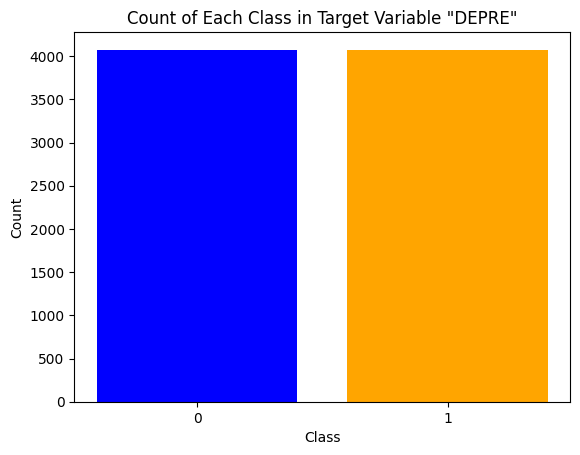

Class 0: Count = 4074, Proportion = 0.5000
Class 1: Count = 4074, Proportion = 0.5000


In [1104]:
# Check the distribution of the target variable
unique_classes, class_counts = np.unique(y_train_smote, return_counts=True)

custom_colors = ['blue', 'orange'] 

# Plot the bar chart
plt.bar(unique_classes, class_counts, color = custom_colors)

# Add title and labels
plt.title('Count of Each Class in Target Variable "DEPRE"')
plt.xlabel('Class')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

# Count the occurrences of each class
class_counts = np.bincount(y_train_smote)

# Calculate the proportions of each class
total_instances = len(y_train_smote)
class_proportions = class_counts / total_instances

# Print the counts and proportions
for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
    print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

In [1105]:
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
num_cols = X_train_smote.select_dtypes(include=['int64', 'float64', 'category']).columns

# Scale only numeric columns
scaler = MinMaxScaler()
X_train_scaled = X_train_smote.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_smote[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [1106]:
X_train_scaled.dtypes

RIDAGEYR        float64
DMDEDUC2        float64
DMDHHSIZ        float64
ALQ130          float64
ALQ142          float64
FNDADI             bool
HUQ010          float64
MCQ010             bool
MCQ053             bool
MCQ160A            bool
MCQ160B            bool
MCQ160C            bool
MCQ160F            bool
MCQ160P            bool
MCQ220             bool
PAD680          float64
RXQ050          float64
SLD012          float64
SLD013          float64
RIAGENDR_2.0       bool
DMDMARTZ_2.0       bool
DMDMARTZ_3.0       bool
dtype: object

In [1107]:
skim(X_train_scaled)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8148   │ │ bool        │ 12    │                                                          │
│ │ Number of columns │ 22     │ │ float64     │ 10    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0   ┃ p25      ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR         │    0 │       0 │   0.52 │   0.29 │    0 │     0.25 │   0.55 │   0.77 │      1 │ ▅▆▅▅▇▆  │  │
│ │ DMDEDUC2         │    0 │       0 │   0.72 │   0.25 │    0 │      0.5 │   0.75 │      1 │      1 │ ▁▁ ▅▇▇  │  │
│ │ DMDHHSIZ         │    0 │       0 │   0.25 │   0.23 │    0 │    0.093 │   0.17 │   0.33 │      1 │ ▇▇▃▂▁▁  │  │
│ │ ALQ130           │    0 │       0 │   0.16 │   0.13 │    0 │    0.076 │   0.13 │   0.17 │      1 │   ▇▂▁   │  │
│ │ ALQ142           │    0 │       0 │   0.34 │   0.12 │    0 │     0.33 │   0.33 │   0.33 │      1 │     ▇   │  │
│ │ HUQ010           │    0 │       0 │   0.47 │   0.25 │    0 │     0.25 │    0.5 │   0.75 │      1 │ ▂▅ ▇▅▁  │  │
│ │ PAD680           │    0 │       0 │   0.27 │   0.16 │    0 │     0.17 │   0.26 │   0.35 │      1 │  ▅▇▅▂   │  │
│ │ RXQ050           │    0 │       0 │    0.5 │   0.39 │    0 │     0.14 │   0.44 │   0.97 │      1 │ ▇▃▃▃▂▇  │  │
│ │ SLD012           │    0 │       0 │   0.47 │   0.13 │    0 │      0.4 │   0.48 │   0.54 │      1 │   ▂▇▇▁  │  │
│ │ SLD013           │    0 │       0 │   0.52 │   0.14 │    0 │     0.44 │   0.51 │   0.58 │      1 │   ▁▅▇▂  │  │
│ └──────────────────┴──────┴─────────┴────────┴────────┴──────┴──────────┴────────┴────────┴────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true            ┃ true rate                   ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ FNDADI                               │            3084 │                        0.38 │       ▇    ▅        │  │
│ │ MCQ010                               │            2665 │                        0.33 │       ▇    ▃        │  │
│ │ MCQ053                               │             765 │                       0.094 │       ▇    ▁        │  │
│ │ MCQ160A                              │            3593 │                        0.44 │       ▇    ▆        │  │
│ │ MCQ160B                              │             518 │                       0.064 │       ▇    ▁        │  │
│ │ MCQ160C                              │             578 │                       0.071 │       ▇    ▁        │  │
│ │ MCQ160F                              │             638 │                       0.078 │       ▇    ▁        │  │
│ │ MCQ160P                              │            12

In [1108]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, make_scorer)

# Define Stratified K-Fold Cross-Validation (10 folds)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics (excluding AUC for now, since we will calculate it separately)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

def plot_roc_curve(model, X_test, y_test, model_name):
    """
    Plots the ROC curve for a single model.
    """
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        return  # If no probability or decision function, skip ROC curve
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

def cross_validate_models(models, X, y, X_test, y_test, cv, scoring):
    results = []

    for name, model in models.items():
        model_results = {
            'Model': name
        }
        auc_scores = []
        all_metrics = {metric: [] for metric in scoring.keys()}  # For storing metrics

        # Measure training time
        start_train = time.time()
        model.fit(X, y)
        end_train = time.time()
        training_time = end_train - start_train

        # Measure prediction time
        start_pred = time.time()
        y_pred = model.predict(X)
        end_pred = time.time()
        prediction_time = end_pred - start_pred

        # Store timings
        model_results['training_time'] = training_time
        model_results['prediction_time'] = prediction_time

        # Compute cross-validation scores
        for metric, scorer in scoring.items():
            try:
                scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
                model_results[metric] = np.mean(scores)  # Store average score
            except Exception:
                model_results[metric] = np.nan

        # Evaluate on the test set after training
        evaluate_test_set(model, X_test, y_test, model_results)

        # Initialize ROC curve plot
        plt.figure(figsize=(8, 6))

        # Compute AUC Score separately for cross-validation
        for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
            X_train, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_train, y_train)

            # Check if the model supports probability or decision function
            if hasattr(model, "predict_proba"):
                y_scores = model.predict_proba(X_test_fold)[:, 1]
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test_fold)
            else:
                y_scores = None  

            if y_scores is not None:
                auc = roc_auc_score(y_test_fold, y_scores)
                auc_scores.append(auc)

                # Plot ROC curve for each fold
                plot_roc_curve(model, X_test_fold, y_test_fold, name)

        # Compute average AUC
        model_results['average_AUC_CV'] = np.mean(auc_scores) if auc_scores else np.nan

        # Finalize ROC curve plot
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Baseline
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()

        # Add model results to the list
        results.append(model_results)

    # Create a DataFrame for comparison
    results_df = pd.DataFrame(results)

    # Ensure that the 'Model' column is the first column
    results_df = results_df[['Model'] + [col for col in results_df.columns if col != 'Model']]

    return results_df

def evaluate_test_set(model, X_test, y_test, model_results):
    # Make predictions
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, zero_division=1)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # AUC score is only available if we have probability predictions
    auc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else np.nan

    # Store the test set evaluation results in the model_results
    model_results['test_accuracy'] = accuracy
    model_results['test_precision'] = precision
    model_results['test_recall'] = recall
    model_results['test_f1'] = f1
    model_results['test_AUC'] = auc

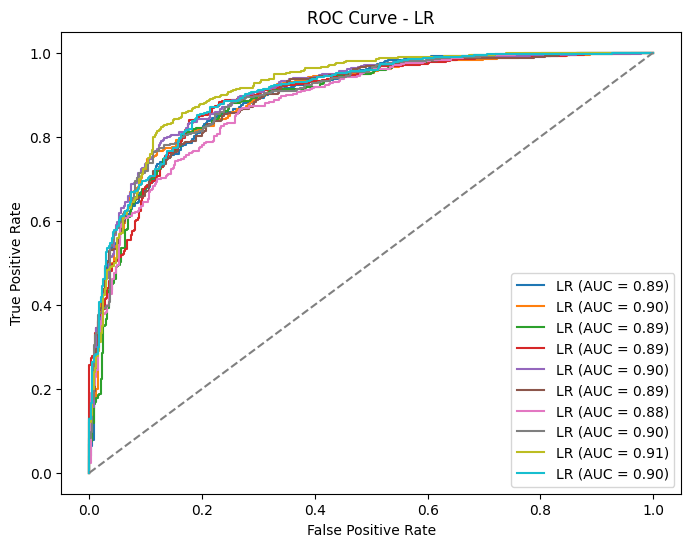

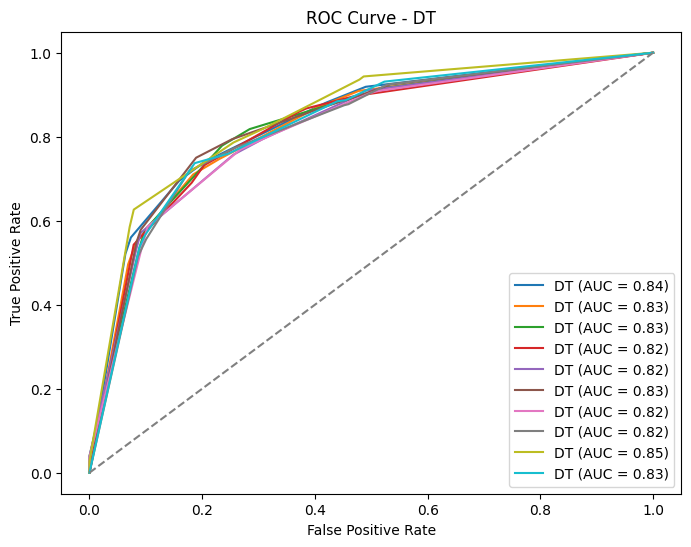

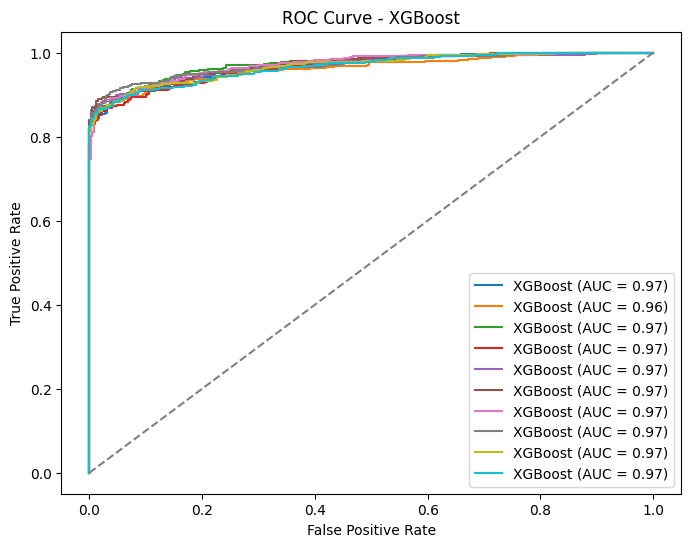

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3667, number of negative: 3666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 7333, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000

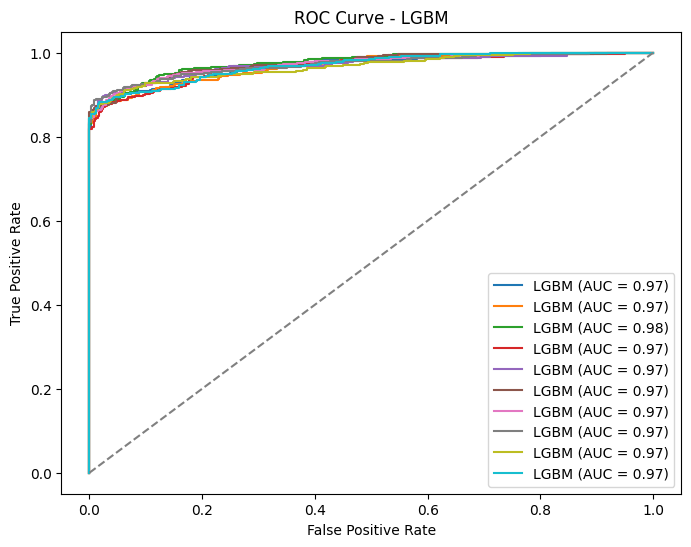

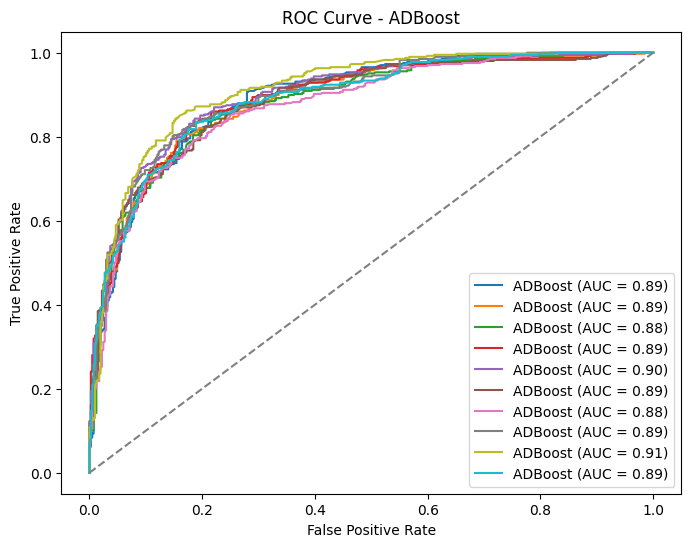

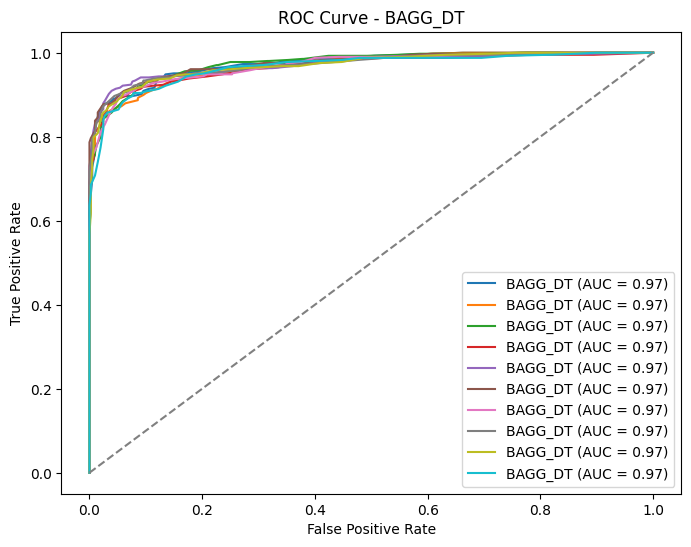

In [1109]:
# Run cross-validation
cv_results = cross_validate_models(models, X_train_scaled, y_train_smote, X_test_scaled, y_test, cv, scoring)

In [1110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_model_results(df):
    # Define the classifiers' names (assuming 'Model' is the index)
    classifiers = df['Model'].tolist()

    # Define the metrics to plot
    timing_cols = ['training_time', 'prediction_time']
    metrics_cols = ['accuracy', 'precision', 'recall', 'f1', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
    auc_cols = ['average_AUC_CV', 'test_AUC']
    
    # Plot the training and prediction times
    fig, ax = plt.subplots(figsize=(12, 6))
    df[timing_cols].plot(kind='bar', ax=ax, color=['#FF5733', '#33FF57'], width=0.8)
    ax.set_xticklabels(classifiers, rotation=45, ha="right")
    ax.set_title('Time Metrics per Classifier', fontsize=16)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_ylabel('Time (seconds)', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot the performance metrics
    fig, ax = plt.subplots(figsize=(12, 8))
    df[metrics_cols].plot(kind='bar', ax=ax, width=0.8)
    ax.set_xticklabels(classifiers, rotation=45, ha="right")
    ax.set_title('Performance Metrics per Classifier', fontsize=16)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot the AUC values
    fig, ax = plt.subplots(figsize=(12, 6))
    df[auc_cols].plot(kind='bar', ax=ax, width=0.8)
    ax.set_xticklabels(classifiers, rotation=45, ha="right")
    ax.set_title('AUC per Classifier', fontsize=16)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_ylabel('AUC', fontsize=12)
    plt.tight_layout()
    plt.show()

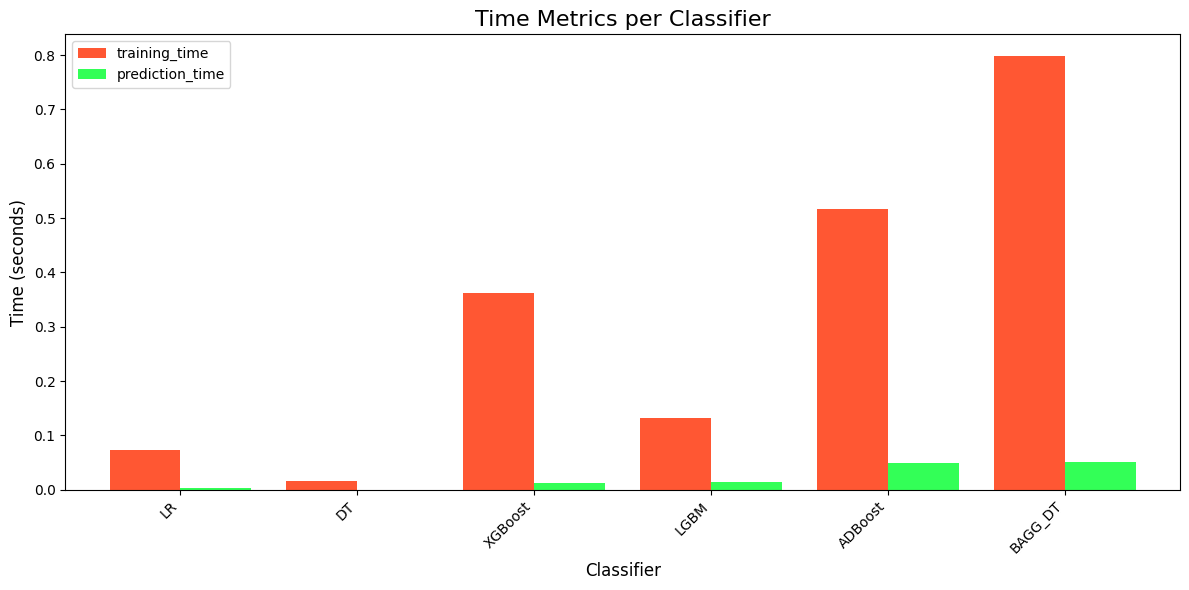

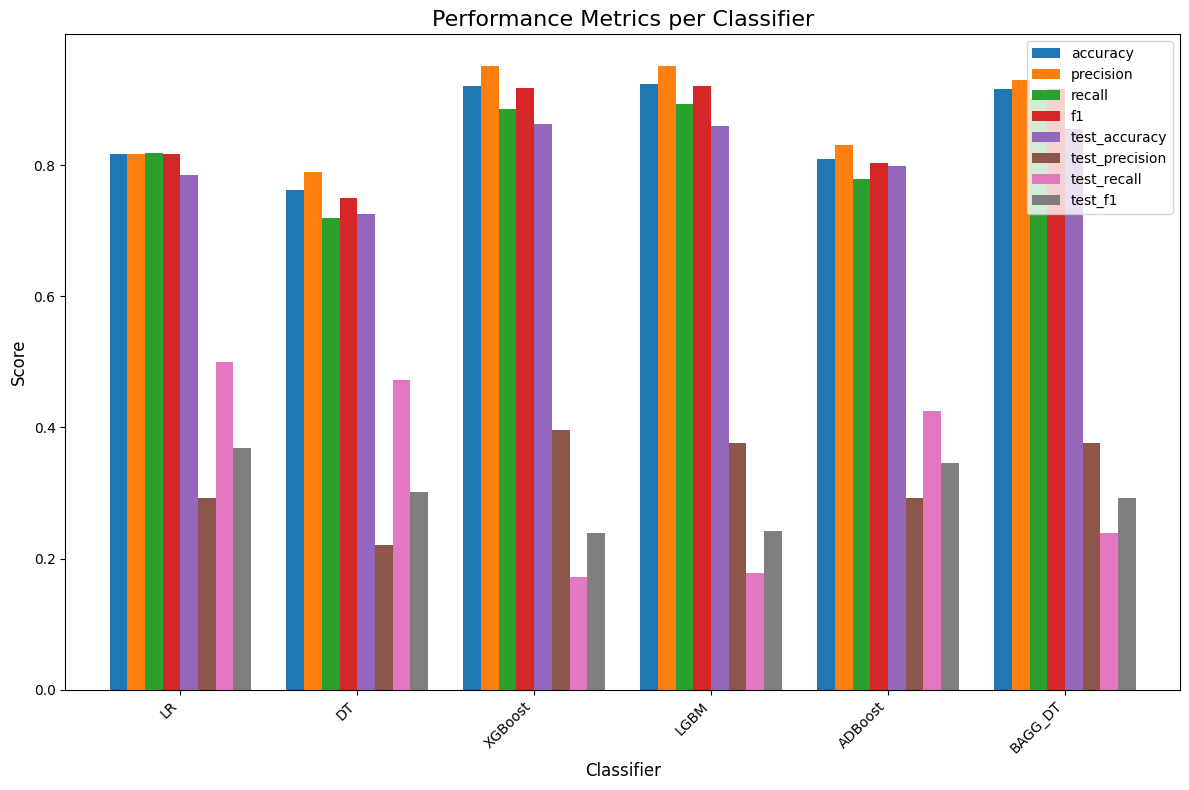

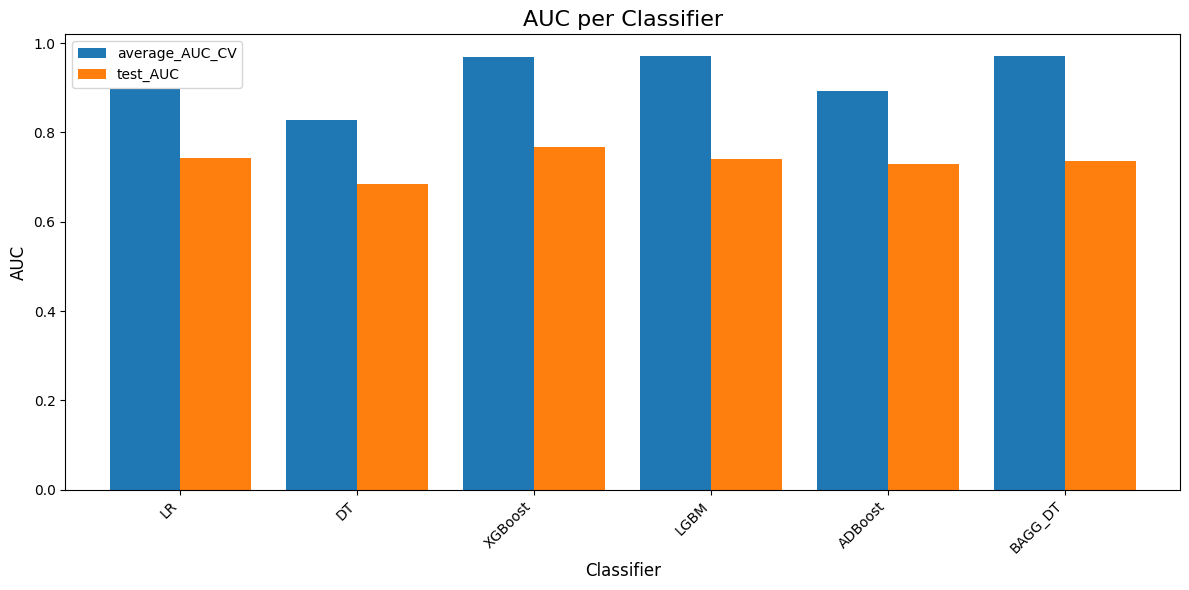

In [1111]:
# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame(cv_results)

plot_model_results(cv_results_df)

In [1112]:
cv_results_df

Model  training_time  prediction_time  accuracy  precision    recall  \
0       LR       0.073272         0.002932  0.817383   0.816671  0.818853   
1       DT       0.015440         0.000000  0.761907   0.789805  0.719166   
2  XGBoost       0.361338         0.013017  0.920593   0.952076  0.885851   
3     LGBM       0.132617         0.014007  0.924030   0.951554  0.893705   
4  ADBoost       0.516932         0.049992  0.810139   0.830569  0.779324   
5  BAGG_DT       0.798154         0.051624  0.916912   0.929607  0.902295   

         f1  test_accuracy  test_precision  test_recall   test_f1  test_AUC  \
0  0.817602       0.785408        0.292000     0.500000  0.368687  0.743504   
1  0.750271       0.725322        0.221154     0.472603  0.301310  0.683900   
2  0.917698       0.863519        0.396825     0.171233  0.239234  0.766223   
3  0.921622       0.860086        0.376812     0.178082  0.241860  0.740197   
4  0.804055       0.799142        0.292453     0.424658  0.346369  0.729341   
5  0.915659       0.854936        0.376344     0.239726  0.292887  0.734799   

   average_AUC_CV  
0        0.896714  
1        0.827543  
2        0.969134  
3        0.970610  
4        0.891510  
5        0.970906

Among all models, XGBoost, LGBM and Bagging Decision Tree had proper balanced performance metrics in Train, although they had a poor result in testing.

### Feature Evaluation
Due to poor test results, an evaluation of features is needed

#### Feature and Permutation Importance

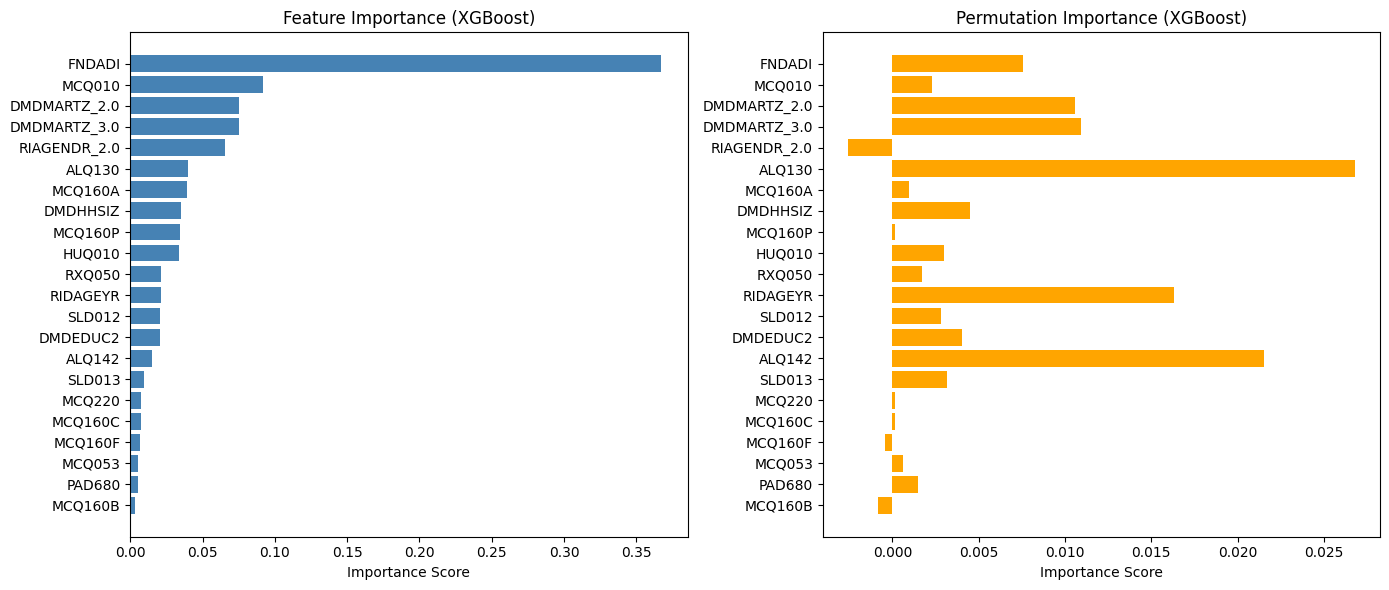

Feature  Permutation Importance  Feature Importance
5         FNDADI                0.007554            0.366960
7         MCQ010                0.002318            0.091887
20  DMDMARTZ_2.0                0.010558            0.075533
21  DMDMARTZ_3.0                0.010901            0.075025
19  RIAGENDR_2.0               -0.002575            0.065552
3         ALQ130                0.026781            0.039605
9        MCQ160A                0.000944            0.039280
2       DMDHHSIZ                0.004464            0.034858
13       MCQ160P                0.000172            0.034220
6         HUQ010                0.003004            0.033783
16        RXQ050                0.001717            0.021602
0       RIDAGEYR                0.016309            0.021031
17        SLD012                0.002833            0.020802
1       DMDEDUC2                0.004034            0.020349
4         ALQ142                0.021545            0.014905
18        SLD013                0.003176            0.009242
14        MCQ220                0.000172            0.007564
11       MCQ160C                0.000172            0.007162
12       MCQ160F               -0.000429            0.006713
8         MCQ053                0.000601            0.005442
15        PAD680                0.001459            0.005286
10       MCQ160B               -0.000858            0.003198

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


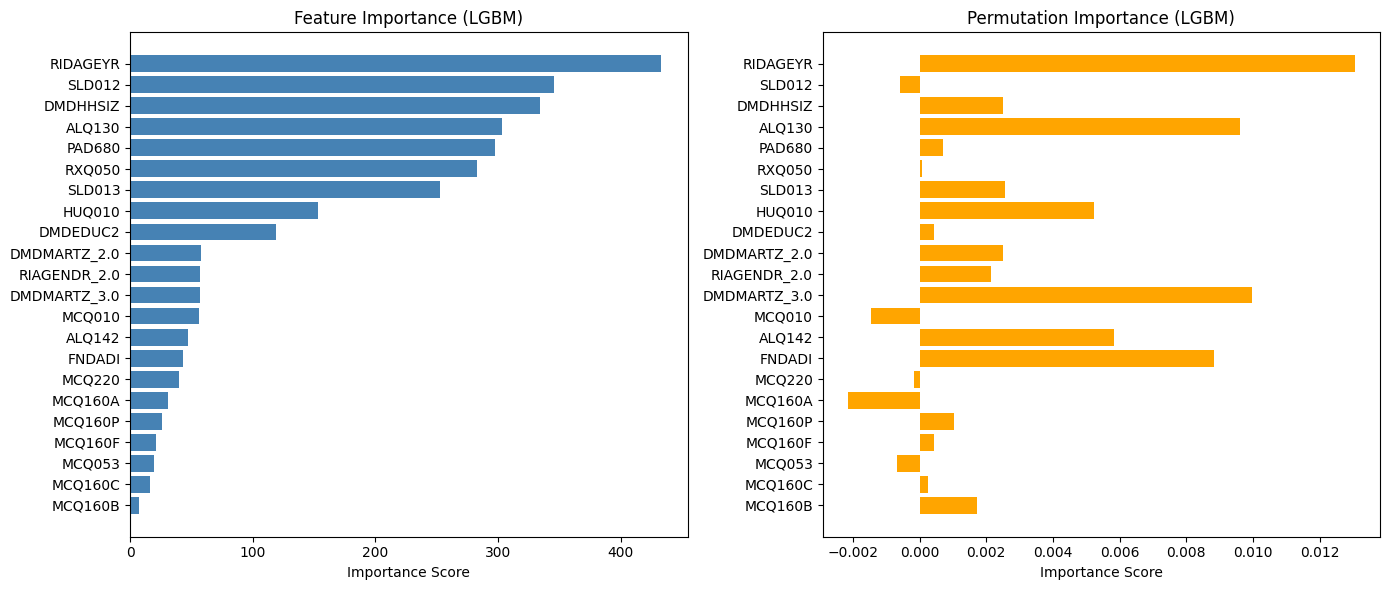

Feature  Permutation Importance  Feature Importance
0       RIDAGEYR                0.013047                 433
17        SLD012               -0.000601                 346
2       DMDHHSIZ                0.002489                 334
3         ALQ130                0.009614                 303
15        PAD680                0.000687                 298
16        RXQ050                0.000086                 283
18        SLD013                0.002575                 253
6         HUQ010                0.005236                 153
1       DMDEDUC2                0.000429                 119
20  DMDMARTZ_2.0                0.002489                  58
19  RIAGENDR_2.0                0.002146                  57
21  DMDMARTZ_3.0                0.009957                  57
7         MCQ010               -0.001459                  56
4         ALQ142                0.005837                  47
5         FNDADI                0.008841                  43
14        MCQ220               -0.000172                  40
9        MCQ160A               -0.002146                  31
13       MCQ160P                0.001030                  26
12       MCQ160F                0.000429                  21
8         MCQ053               -0.000687                  19
11       MCQ160C                0.000258                  16
10       MCQ160B                0.001717                   7

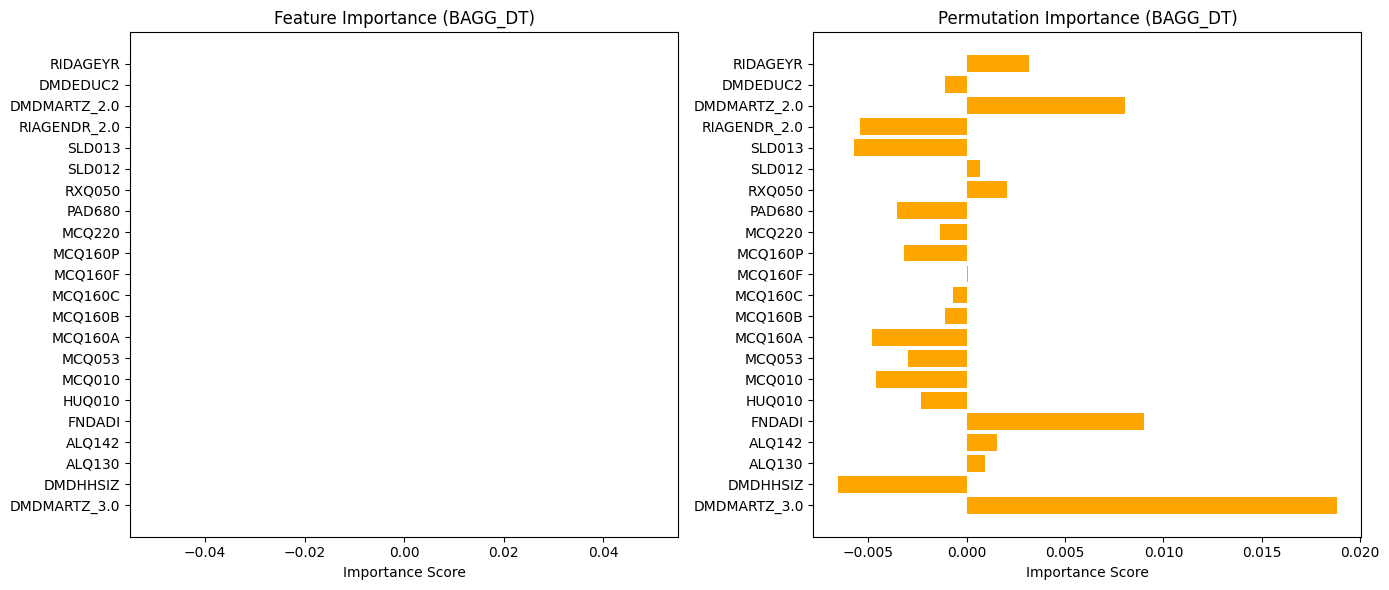

Feature  Permutation Importance  Feature Importance
0       RIDAGEYR                0.003176                 0.0
1       DMDEDUC2               -0.001116                 0.0
20  DMDMARTZ_2.0                0.008069                 0.0
19  RIAGENDR_2.0               -0.005408                 0.0
18        SLD013               -0.005751                 0.0
17        SLD012                0.000687                 0.0
16        RXQ050                0.002060                 0.0
15        PAD680               -0.003519                 0.0
14        MCQ220               -0.001373                 0.0
13       MCQ160P               -0.003176                 0.0
12       MCQ160F                0.000086                 0.0
11       MCQ160C               -0.000687                 0.0
10       MCQ160B               -0.001116                 0.0
9        MCQ160A               -0.004807                 0.0
8         MCQ053               -0.003004                 0.0
7         MCQ010               -0.004635                 0.0
6         HUQ010               -0.002318                 0.0
5         FNDADI                0.009013                 0.0
4         ALQ142                0.001545                 0.0
3         ALQ130                0.000944                 0.0
2       DMDHHSIZ               -0.006524                 0.0
21  DMDMARTZ_3.0                0.018798                 0.0

In [1113]:
from sklearn.inspection import permutation_importance

# List of models to evaluate
selected_models = ["XGBoost", "LGBM", "BAGG_DT"]  # Ensure these exist in models dict
results = {}

# Iterate over selected models
for model_name in selected_models:
    if model_name not in models:
        raise ValueError(f"{model_name} model not found in the provided dictionary.")

    model = models[model_name]

    # Compute permutation importance
    perm_importance = permutation_importance(
        model, X_test_scaled, y_test, scoring="accuracy", 
        n_repeats=10, random_state=42
    )

    # Compute feature importance (from model's built-in attribute)
    model.fit(X_train_scaled, y_train_smote)  # Ensure model is trained
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
    else:
        feature_importance = np.zeros(X_test_scaled.shape[1])  # Default if not available

    # Store results in a DataFrame
    importance_df = pd.DataFrame({
        "Feature": X_test_scaled.columns,
        "Permutation Importance": perm_importance.importances_mean,
        "Feature Importance": feature_importance
    })

    # Sort by feature importance
    importance_df = importance_df.sort_values(by="Feature Importance", ascending=False)
    
    # Save results
    results[model_name] = importance_df

    # 📊 Create separate bar plots for Feature Importance and Permutation Importance
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Side-by-side plots

    # Feature Importance Plot (Left)
    axes[0].barh(importance_df["Feature"], importance_df["Feature Importance"], color="steelblue")
    axes[0].set_title(f"Feature Importance ({model_name})")
    axes[0].set_xlabel("Importance Score")
    axes[0].invert_yaxis()  # Highest importance at top

    # Permutation Importance Plot (Right)
    axes[1].barh(importance_df["Feature"], importance_df["Permutation Importance"], color="orange")
    axes[1].set_title(f"Permutation Importance ({model_name})")
    axes[1].set_xlabel("Importance Score")
    axes[1].invert_yaxis()  

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Display DataFrame for the model
    display(importance_df)

In [1114]:
'''
from sklearn.feature_selection import RFE

# Initialize an empty list to store selected features for each model
all_selected_features = []

# Apply RFE for each model and store the selected features
for name, model in models.items():
    # Fit RFE
    selector = RFE(model, n_features_to_select=10)  # You can adjust the number of features
    selector = selector.fit(X_train_scaled, y_train_smote)

    # Get selected features
    selected_features = X_train_scaled.columns[selector.support_].tolist()

    # Add to the list of selected features for each model
    all_selected_features.append(set(selected_features))

# Combine the selected features across all models (union of sets)
final_selected_features = list(set.union(*all_selected_features))

# Reduce the dataset to the final selected features
X_train_selected_final = X_train_scaled[final_selected_features]
X_test_selected_final = X_test_scaled[final_selected_features]

# Print the final selected features
print("Final Selected Features Across Models:")
print(final_selected_features)
'''

'\nfrom sklearn.feature_selection import RFE\n\n# Initialize an empty list to store selected features for each model\nall_selected_features = []\n\n# Apply RFE for each model and store the selected features\nfor name, model in models.items():\n    # Fit RFE\n    selector = RFE(model, n_features_to_select=10)  # You can adjust the number of features\n    selector = selector.fit(X_train_scaled, y_train_smote)\n\n    # Get selected features\n    selected_features = X_train_scaled.columns[selector.support_].tolist()\n\n    # Add to the list of selected features for each model\n    all_selected_features.append(set(selected_features))\n\n# Combine the selected features across all models (union of sets)\nfinal_selected_features = list(set.union(*all_selected_features))\n\n# Reduce the dataset to the final selected features\nX_train_selected_final = X_train_scaled[final_selected_features]\nX_test_selected_final = X_test_scaled[final_selected_features]\n\n# Print the final selected features\npr

#### Selecting Features

In [1115]:
X_train_scaled.columns

Index(['RIDAGEYR', 'DMDEDUC2', 'DMDHHSIZ', 'ALQ130', 'ALQ142', 'FNDADI',
       'HUQ010', 'MCQ010', 'MCQ053', 'MCQ160A', 'MCQ160B', 'MCQ160C',
       'MCQ160F', 'MCQ160P', 'MCQ220', 'PAD680', 'RXQ050', 'SLD012', 'SLD013',
       'RIAGENDR_2.0', 'DMDMARTZ_2.0', 'DMDMARTZ_3.0'],
      dtype='object')

In [1116]:
selected_features = ["RIDAGEYR", "RIAGENDR_2.0","DMDMARTZ_2.0", "DMDMARTZ_3.0", "DMDHHSIZ","HUQ010","SLD012", "ALQ130", "FNDADI"]

# Reduce dataset to selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

### Tunning Hyperparameters

In [1117]:
'''
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    "LR": {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"], "solver": ["liblinear"]},
    "DT": {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 5, 10]},
    "RF": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10], "max_features": ["sqrt", "log2"]},
    "KNN": {"n_neighbors": [3, 5, 7], "p": [1, 2], "weights": ["uniform", "distance"]},
    "SVM_rbf": {"C": [0.01, 0.1, 1, 10], "gamma": ["scale", "auto"]},
    "GB": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 6, 10]},
    "XGB": {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.1, 0.3]},
    #"LGBM": {"n_estimators": [100, 200],"learning_rate": [0.01, 0.1, 0.3],"max_depth": [3, 5, 7],"num_leaves": [31, 50, 100],
    #        "min_child_samples": [10, 20, 50],"colsample_bytree": [0.6, 0.8, 1.0],"subsample": [0.6, 0.8, 1.0],"reg_alpha": [0.0, 0.1, 1.0],
    #        "reg_lambda": [0.0, 0.1, 1.0]},
    "AdaBoost": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 1]}
}

def tune_models(models, param_grids, X_train, y_train):
    best_models = {}
    for name, model in models.items():
        if name in param_grids:  # Check if params exist for this model
            print(f"Tuning {name}...")
            grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="recall", n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_models[name] = grid_search.best_estimator_
            print(f"Best params for {name}: {grid_search.best_params_}\n")
        else:
            best_models[name] = model  # Keep default model if no params
    return best_models

# Run GridSearchCV on all models
best_models = tune_models(models, param_grids, X_train_selected, y_train_smote)
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Define hyperparameter grids\nparam_grids = {\n    "LR": {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"], "solver": ["liblinear"]},\n    "DT": {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 5, 10]},\n    "RF": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10], "max_features": ["sqrt", "log2"]},\n    "KNN": {"n_neighbors": [3, 5, 7], "p": [1, 2], "weights": ["uniform", "distance"]},\n    "SVM_rbf": {"C": [0.01, 0.1, 1, 10], "gamma": ["scale", "auto"]},\n    "GB": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 6, 10]},\n    "XGB": {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.1, 0.3]},\n    #"LGBM": {"n_estimators": [100, 200],"learning_rate": [0.01, 0.1, 0.3],"max_depth": [3, 5, 7],"num_leaves": [31, 50, 100],\n    #        "min_child_samples": [10, 20, 50],"colsample_bytree": [0.6, 0.8, 1.0],"subsample": [0.6, 0.8, 1.0],"reg_alpha": [

In [1118]:
''''
# Tunning Hyperparameters for LR

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=500)

# Define parameter grid
param_grid_log_reg = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'solver': ['liblinear', 'lbfgs', 'saga'],  
    'class_weight': ['balanced', None],  
    'l1_ratio': [0.1, 0.5, 0.9]  # Used only for ElasticNet
}

# RandomizedSearchCV to find the best hyperparameters
random_search_log_reg = RandomizedSearchCV(
    estimator=log_reg_model, 
    param_distributions=param_grid_log_reg, 
    n_iter=50, 
    scoring=['recall', 'roc_auc'],  # Optimize Recall & AUC
    refit='recall',  # Prioritize Recall
    cv=3, 
    verbose=2, 
    random_state=42
)

random_search_log_reg.fit(X_train_selected, y_train_smote)
'''

"'\n# Tunning Hyperparameters for LR\n\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.linear_model import LogisticRegression\n\n# Create Logistic Regression model\nlog_reg_model = LogisticRegression(random_state=42, max_iter=500)\n\n# Define parameter grid\nparam_grid_log_reg = {\n    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  \n    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  \n    'solver': ['liblinear', 'lbfgs', 'saga'],  \n    'class_weight': ['balanced', None],  \n    'l1_ratio': [0.1, 0.5, 0.9]  # Used only for ElasticNet\n}\n\n# RandomizedSearchCV to find the best hyperparameters\nrandom_search_log_reg = RandomizedSearchCV(\n    estimator=log_reg_model, \n    param_distributions=param_grid_log_reg, \n    n_iter=50, \n    scoring=['recall', 'roc_auc'],  # Optimize Recall & AUC\n    refit='recall',  # Prioritize Recall\n    cv=3, \n    verbose=2, \n    random_state=42\n)\n\nrandom_search_log_reg.fit(X_train_selected, y_train_smote)\n"

In [1119]:
# Tunning Hyperparameters for XGBoost
'''
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Create XGBoost model
xgboost_model = xgb.XGBClassifier(eval_metric="logloss")

# Define parameter grid
param_grid_xgb = {
    'scale_pos_weight': [1, 2, 5, 10],  # Handling class imbalance
    'max_depth': [3, 5, 7, 10],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'n_estimators': [100, 200],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.5, 1],  
    'reg_alpha': [0, 0.01, 0.1, 1],  
    'reg_lambda': [0, 0.01, 0.1, 1]  
}

# RandomizedSearchCV to find the best hyperparameters
random_search_xgb = RandomizedSearchCV(
    estimator=xgboost_model, 
    param_distributions=param_grid_xgb, 
    n_iter=50, 
    scoring=['recall', 'roc_auc'],  # Focus on Recall & AUC
    refit='recall',  # Prioritize Recall
    cv=3, 
    verbose=2, 
    random_state=42
)

random_search_xgb.fit(X_train_selected, y_train_smote)
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nimport xgboost as xgb\n\n# Create XGBoost model\nxgboost_model = xgb.XGBClassifier(eval_metric="logloss")\n\n# Define parameter grid\nparam_grid_xgb = {\n    \'scale_pos_weight\': [1, 2, 5, 10],  # Handling class imbalance\n    \'max_depth\': [3, 5, 7, 10],  \n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],  \n    \'n_estimators\': [100, 200],  \n    \'subsample\': [0.6, 0.8, 1.0],  \n    \'colsample_bytree\': [0.6, 0.8, 1.0],  \n    \'gamma\': [0, 0.1, 0.5, 1],  \n    \'reg_alpha\': [0, 0.01, 0.1, 1],  \n    \'reg_lambda\': [0, 0.01, 0.1, 1]  \n}\n\n# RandomizedSearchCV to find the best hyperparameters\nrandom_search_xgb = RandomizedSearchCV(\n    estimator=xgboost_model, \n    param_distributions=param_grid_xgb, \n    n_iter=50, \n    scoring=[\'recall\', \'roc_auc\'],  # Focus on Recall & AUC\n    refit=\'recall\',  # Prioritize Recall\n    cv=3, \n    verbose=2, \n    random_state=42\n)\n\nrandom_search_xgb.fit(X_train_selec

In [1120]:
# Tunning Hyperparameters for LGBM
'''
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Create LGBM model
lgbm_model = lgb.LGBMClassifier()

# Define parameter grid
param_grid_lgbm = {
    'scale_pos_weight': [1, 2, 5, 10],  # Handling class imbalance
    'num_leaves': [31, 50, 100, 150],  
    'max_depth': [-1, 3, 5, 10],  
    'learning_rate': [0.005, 0.01, 0.05, 0.1],  
    'n_estimators': [100, 200],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'min_child_samples': [5, 10, 20, 50],  
    'reg_alpha': [0, 0.01, 0.1, 1],  
    'reg_lambda': [0, 0.01, 0.1, 1]  
}

# RandomizedSearchCV to find the best hyperparameters
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model, 
    param_distributions=param_grid_lgbm, 
    n_iter=50, 
    scoring=['recall', 'roc_auc'],  # Focus on Recall & AUC
    refit='recall',  # Prioritize Recall
    cv=3, 
    verbose=2, 
    random_state=42
)

random_search_lgbm.fit(X_train_selected, y_train_smote)
'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\nimport lightgbm as lgb\n\n# Create LGBM model\nlgbm_model = lgb.LGBMClassifier()\n\n# Define parameter grid\nparam_grid_lgbm = {\n    'scale_pos_weight': [1, 2, 5, 10],  # Handling class imbalance\n    'num_leaves': [31, 50, 100, 150],  \n    'max_depth': [-1, 3, 5, 10],  \n    'learning_rate': [0.005, 0.01, 0.05, 0.1],  \n    'n_estimators': [100, 200],  \n    'subsample': [0.6, 0.8, 1.0],  \n    'colsample_bytree': [0.6, 0.8, 1.0],  \n    'min_child_samples': [5, 10, 20, 50],  \n    'reg_alpha': [0, 0.01, 0.1, 1],  \n    'reg_lambda': [0, 0.01, 0.1, 1]  \n}\n\n# RandomizedSearchCV to find the best hyperparameters\nrandom_search_lgbm = RandomizedSearchCV(\n    estimator=lgbm_model, \n    param_distributions=param_grid_lgbm, \n    n_iter=50, \n    scoring=['recall', 'roc_auc'],  # Focus on Recall & AUC\n    refit='recall',  # Prioritize Recall\n    cv=3, \n    verbose=2, \n    random_state=42\n)\n\nrandom_search_lgbm.fit(X_trai

In [1121]:
'''
# Tunning Hyperparameters for AdaBoost

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create AdaBoost model with DecisionTree as base_estimator
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Define parameter grid
param_grid_adaboost = {
    'n_estimators': [50, 100, 200, 500],  
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],  
    'algorithm': ['SAMME'],  
    'estimator__max_depth': [1, 3, 5],  
    'estimator__min_samples_split': [2, 5, 10],  
    'estimator__min_samples_leaf': [1, 5, 10]
}

# RandomizedSearchCV to find the best hyperparameters
random_search_adaboost = RandomizedSearchCV(
    estimator=adaboost_model, 
    param_distributions=param_grid_adaboost, 
    n_iter=50, 
    scoring=['recall', 'roc_auc'],  # Focus on Recall & AUC
    refit='recall',  # Prioritize Recall
    cv=3, 
    verbose=2, 
    random_state=42
)

random_search_adaboost.fit(X_train_selected, y_train_smote)
'''

"\n# Tunning Hyperparameters for AdaBoost\n\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.tree import DecisionTreeClassifier\n\n# Create AdaBoost model with DecisionTree as base_estimator\nadaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier())\n\n# Define parameter grid\nparam_grid_adaboost = {\n    'n_estimators': [50, 100, 200, 500],  \n    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],  \n    'algorithm': ['SAMME'],  \n    'estimator__max_depth': [1, 3, 5],  \n    'estimator__min_samples_split': [2, 5, 10],  \n    'estimator__min_samples_leaf': [1, 5, 10]\n}\n\n# RandomizedSearchCV to find the best hyperparameters\nrandom_search_adaboost = RandomizedSearchCV(\n    estimator=adaboost_model, \n    param_distributions=param_grid_adaboost, \n    n_iter=50, \n    scoring=['recall', 'roc_auc'],  # Focus on Recall & AUC\n    refit='recall',  # Prioritize Recall\n    cv=3, \n    verbose=2, \n    random_

In [1122]:
# Tunning Hyperparameters for Bagging with Decision Tree
'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create Bagging model with Decision Tree as base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Define parameter grid
param_grid_bagging = {
    'n_estimators': [50, 100, 200],  
    'max_samples': [0.6, 0.7, 0.8, 1.0],  
    'max_features': [0.6, 0.7, 0.8, 1.0],  
    'bootstrap': [True, False],  
    'estimator__max_depth': [None, 5, 10, 20],  
    'estimator__min_samples_split': [2, 5, 10],  
    'estimator__min_samples_leaf': [1, 5, 10],  
    'estimator__criterion': ['gini', 'entropy']
}

# RandomizedSearchCV to find the best hyperparameters
random_search_bagging = RandomizedSearchCV(
    estimator=bagging_model, 
    param_distributions=param_grid_bagging, 
    n_iter=50, 
    scoring=['recall', 'roc_auc'],  # Optimize Recall & AUC
    refit='recall',  # Prioritize Recall in selection
    cv=3, 
    verbose=2, 
    random_state=42
)

random_search_bagging.fit(X_train_selected, y_train_smote)
'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import BaggingClassifier\nfrom sklearn.tree import DecisionTreeClassifier\n\n# Create Bagging model with Decision Tree as base estimator\nbagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)\n\n# Define parameter grid\nparam_grid_bagging = {\n    'n_estimators': [50, 100, 200],  \n    'max_samples': [0.6, 0.7, 0.8, 1.0],  \n    'max_features': [0.6, 0.7, 0.8, 1.0],  \n    'bootstrap': [True, False],  \n    'estimator__max_depth': [None, 5, 10, 20],  \n    'estimator__min_samples_split': [2, 5, 10],  \n    'estimator__min_samples_leaf': [1, 5, 10],  \n    'estimator__criterion': ['gini', 'entropy']\n}\n\n# RandomizedSearchCV to find the best hyperparameters\nrandom_search_bagging = RandomizedSearchCV(\n    estimator=bagging_model, \n    param_distributions=param_grid_bagging, \n    n_iter=50, \n    scoring=['recall', 'roc_auc'],  # Optimize Recall & AUC\n    refit='recall',

In [1123]:
# Best hyperparameters LR
#print("Best Hyperparameters for LR:", random_search_log_reg.best_params_)

In [1124]:
# Best hyperparameters XGBoost
#print("Best Hyperparameters for XGBoost:", random_search_xgb.best_params_)

In [1125]:
# Best hyperparameters LGBM
# print("Best Hyperparameters for LGBM:", random_search_lgbm.best_params_)

In [1126]:
# Best hyperparameters AdaBoost
#print("Best Hyperparameters for AdaBoost:", random_search_adaboost.best_params_)

In [1127]:
# Best hyperparameters Bagging Decision Tree
#print("Best Hyperparameters for Bagging Classifier:", random_search_bagging.best_params_)

In [1128]:
# Update models hyperparameters

models_tunned = {
    #"LR": LogisticRegression(C=0.001, penalty="elasticnet" , solver="saga", l1_ratio=0.9, class_weight='balanced'),
    #"DT": DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, criterion='gini'),
    # "RF": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5 , min_samples_split=10 , max_features='log2',  class_weight='balanced'),
    # "KNN": KNeighborsClassifier(n_neighbors=7, p=2, weights="distance"),
    # "SVM_rbf": SVC(kernel='rbf', C=1, gamma="auto", class_weight='balanced'),
    # "GBoost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=3, min_child_weight=5, min_child_samples=10, gamma=0,
                                subsample=0.6, colsample_bytree=0.8, colsample_bylevel=0.8,
                                learning_rate=0.01, reg_alpha=0.1, reg_lambda=1,
                                scale_pos_weight=5,
                                random_state=42),
    "LGBM": LGBMClassifier(boosting_type="gbdt", subsample=0.8, num_leaves=31, scale_pos_weight=10,
                           n_estimators=100, min_child_samples=5, max_depth=3, reg_alpha=0.01, reg_lambda=0,
                            learning_rate=0.005, colsample_bytree=0.8, class_weight="balanced", random_state=42),
    #"ADBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.01, algorithm="SAMME"),
    "BAGG_DT": (BaggingClassifier(n_estimators=100, max_samples=1.0, max_features=0.7,bootstrap=True, random_state=42))
}

### Retrain and Retest Models after Feature Selection and Hyperparameters Tunning

c:\Users\ggrys\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ggrys\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ggrys\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_samples" } are

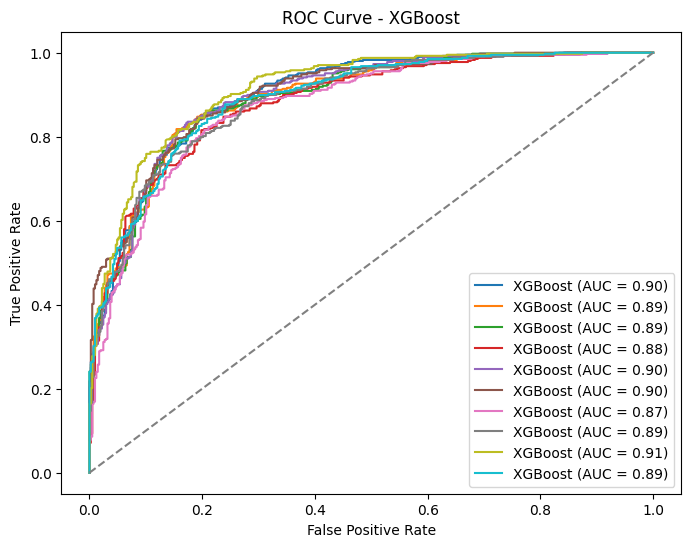

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

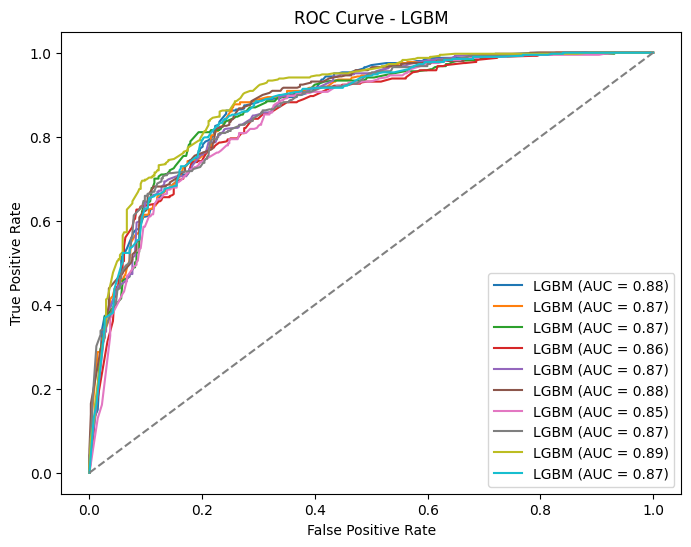

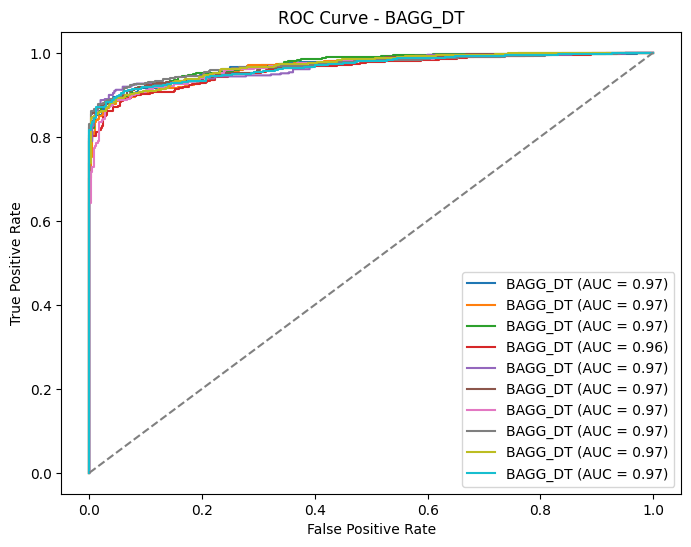

In [1129]:
# Run cross-validation
cv_results_selected = cross_validate_models(models_tunned, X_train_selected, y_train_smote, X_test_selected, y_test, cv, scoring)

# Convert to DataFrame for better visualization
cv_results_selected_df = pd.DataFrame(cv_results_selected)

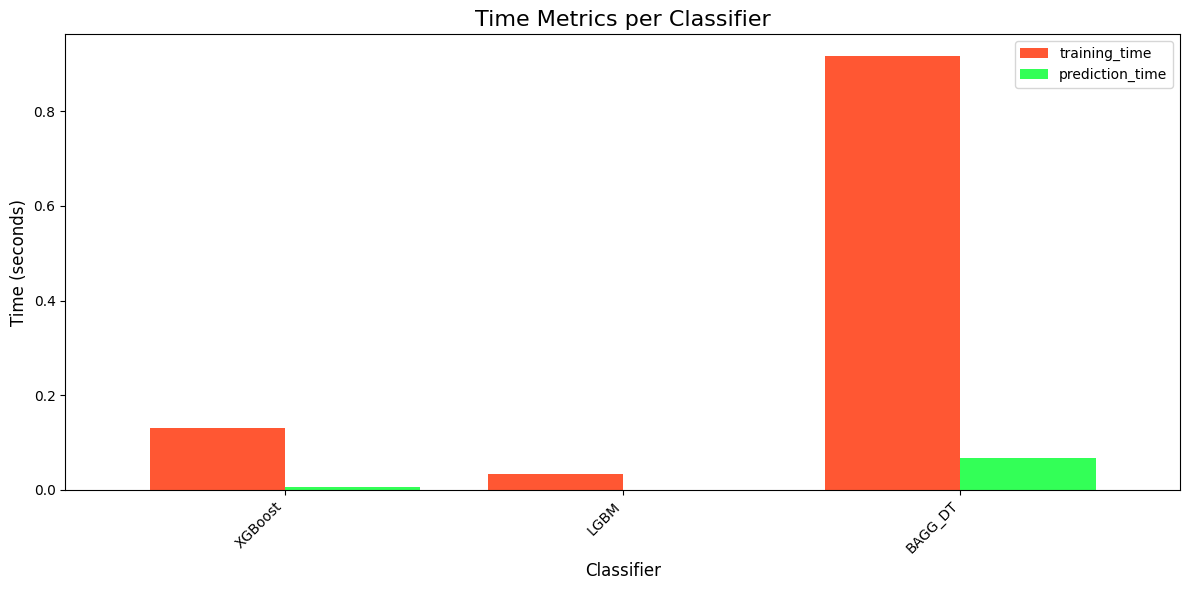

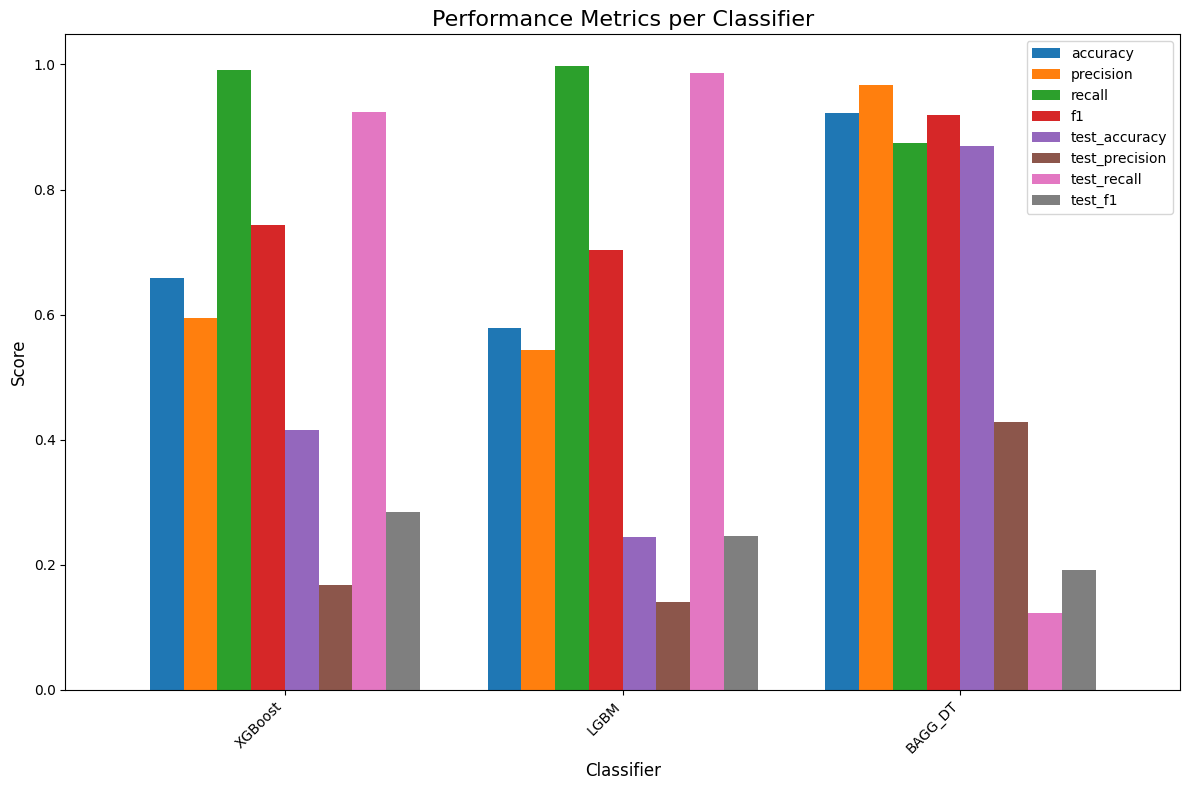

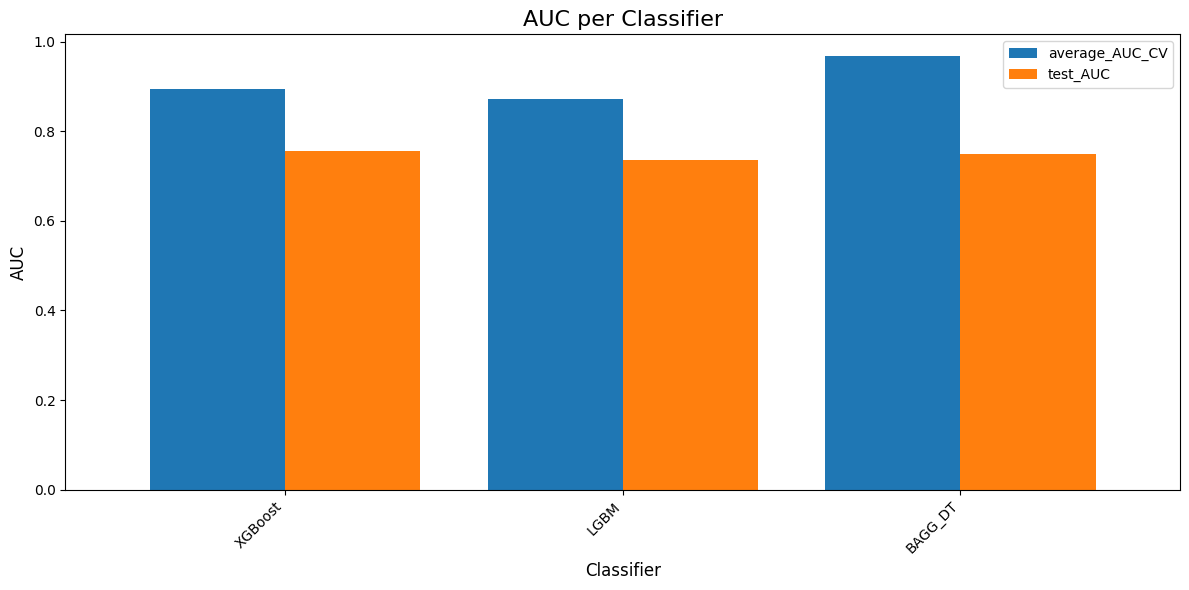

Model  training_time  prediction_time  accuracy  precision    recall  \
0  XGBoost       0.131523         0.006379  0.658322   0.595171  0.990673   
1     LGBM       0.033822         0.000000  0.578303   0.542632  0.998283   
2  BAGG_DT       0.916956         0.066735  0.922435   0.966719  0.875051   

         f1  test_accuracy  test_precision  test_recall   test_f1  test_AUC  \
0  0.743581       0.415451        0.167702     0.924658  0.283912  0.755764   
1  0.703062       0.244635        0.140900     0.986301  0.246575  0.736271   
2  0.918529       0.869528        0.428571     0.123288  0.191489  0.750010   

   average_AUC_CV  
0        0.893564  
1        0.871751  
2        0.967849

In [1130]:
plot_model_results(cv_results_selected_df)
cv_results_selected_df

### Select and Export Models

In [1131]:
import pickle

# Step 1: Select the best model based on Test Recall and F1 Score
best_model_df = cv_results_selected_df.nlargest(1, ['test_recall', 'test_f1'])  # Select only 1 model

# Step 2: Retrieve the best model from the models dictionary
best_model_name = best_model_df['Model'].values[0]
best_model = models_tunned[best_model_name]

# Step 3: Save the best model
filename = f"best_model.pkl"  # e.g., "best_model_RandomForest.pkl"
with open(filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"Best model '{best_model_name}' has been saved as '{filename}'.")

# Step 4: Print the metrics for the best model
print("\nBest Model Based on Test Recall and Test F1:\n")
print(best_model_df.to_string(index=False))  # Displays table without the default index

Best model 'LGBM' has been saved as 'best_model.pkl'.

Best Model Based on Test Recall and Test F1:

Model  training_time  prediction_time  accuracy  precision   recall       f1  test_accuracy  test_precision  test_recall  test_f1  test_AUC  average_AUC_CV
 LGBM       0.033822              0.0  0.578303   0.542632 0.998283 0.703062       0.244635          0.1409     0.986301 0.246575  0.736271        0.871751


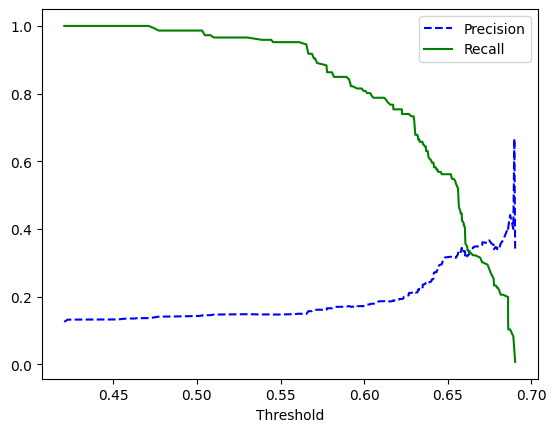

In [1132]:
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_probs = best_model.predict_proba(X_test_selected)[:, 1]

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the curve
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

### Prediction Task

Predict the probability of depression with person's suitable data

In [1133]:
# Step 1: Load the saved model from the pickle file
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [1134]:
skim(X_train_selected)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8148   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ bool        │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0   ┃ p25      ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR         │    0 │       0 │   0.52 │   0.29 │    0 │     0.25 │   0.55 │   0.77 │      1 │ ▅▆▅▅▇▆  │  │
│ │ DMDHHSIZ         │    0 │       0 │   0.25 │   0.23 │    0 │    0.093 │   0.17 │   0.33 │      1 │ ▇▇▃▂▁▁  │  │
│ │ HUQ010           │    0 │       0 │   0.47 │   0.25 │    0 │     0.25 │    0.5 │   0.75 │      1 │ ▂▅ ▇▅▁  │  │
│ │ SLD012           │    0 │       0 │   0.47 │   0.13 │    0 │      0.4 │   0.48 │   0.54 │      1 │   ▂▇▇▁  │  │
│ │ ALQ130           │    0 │       0 │   0.16 │   0.13 │    0 │    0.076 │   0.13 │   0.17 │      1 │   ▇▂▁   │  │
│ └──────────────────┴──────┴─────────┴────────┴────────┴──────┴──────────┴────────┴────────┴────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true            ┃ true rate                   ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ RIAGENDR_2.0                         │            5648 │                        0.69 │       ▃    ▇        │  │
│ │ DMDMARTZ_2.0                         │            2791 │                        0.34 │       ▇    ▅        │  │
│ │ DMDMARTZ_3.0                         │            2645 │                        0.32 │       ▇    ▃        │  │
│ │ FNDADI                               │            3084 │                        0.38 │       ▇    ▅        │  │
│ └──────────────────────────────────────┴─────────────────┴─────────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [1136]:
import pandas as pd

def preprocess_input(data):
    """
    Transforms raw user input into the required format for model prediction.
    """
    
    # One-hot encoding for gender
    data['RIAGENDR_2.0'] = 1 if data['gender'] == 'Female' else 0

    # One-hot encoding for marital status
    data['DMDMARTZ_2.0'] = 1 if data['marital_status'] == 'Divorced' else 0
    data['DMDMARTZ_3.0'] = 1 if data['marital_status'] == 'Never Married' else 0

    # Boolean conversion for disabilities
    data['FNDADI'] = 1 if data['disabilities'] == 'Yes' else 0

    # Selecting only relevant columns
    input_features = ['RIDAGEYR', 'RIAGENDR_2.0', 'DMDMARTZ_2.0', 'DMDMARTZ_3.0', 
                      'DMDHHSIZ', 'HUQ010', 'SLD012', 'ALQ130', 'FNDADI']

    # Convert to DataFrame
    df = pd.DataFrame([data], columns=input_features)

    return df

In [ ]:
# Simulating a new user input from a form
new_data_1 = {
    'RIDAGEYR': 12,
    'gender': 'Male',
    'marital_status': 'Divorced',
    'DMDHHSIZ': 3,
    'HUQ010': 2,  # Very good health
    'SLD012': 3,
    'ALQ130': 12,
    'disabilities': 'No'
}

processed_data = preprocess_input(new_data_1)
print(processed_data)

   RIDAGEYR  RIAGENDR_2.0  DMDMARTZ_2.0  DMDMARTZ_3.0  DMDHHSIZ  HUQ010  \
0        12             0             1             0         3       2   

   SLD012  ALQ130  FNDADI  
0       3      12       0  


In [1144]:
import numpy as np

def get_prediction_with_probabilities(model, processed_data):
    """
    Given a trained model and processed input data, this function returns 
    the predicted class, class probabilities, and confidence of the prediction.
    
    Parameters:
    - model: Trained machine learning model (with predict and predict_proba methods).
    - processed_data: Preprocessed input data in the correct format for the model.
    
    Returns:
    - predicted_class (int): The predicted class.
    - probabilities (array): Probabilities of all classes.
    - confidence (float): Probability of the predicted class.
    """
    # Get predicted class
    prediction = model.predict(processed_data)
    predicted_class = int(prediction[0])  # Ensure it's an integer

    # Get class probabilities
    probabilities = model.predict_proba(processed_data)

    # Get confidence of predicted class
    confidence = probabilities[0][predicted_class]  

    return predicted_class, probabilities[0], confidence

Predicted class: 1
Class probabilities: [0.40303169 0.59696831]
Confidence: 0.60


In [1147]:
import matplotlib.pyplot as plt

def plot_class_probabilities(probabilities):
    """
    Given the class probabilities, this function plots a bar chart.
    
    Parameters:
    - probabilities: The probabilities for each class (array-like).
    """
    # Class labels (adjust these based on your model's classes)
    class_labels = ['Non-Depression', 'Depression']

    # Create a bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(class_labels, probabilities, color=['blue', 'green'])

    # Add title and labels
    plt.title('Class Probabilities')
    plt.xlabel('Classes')
    plt.ylabel('Probability')

    # Show the chart
    plt.show()

Predicted class: 1
Class probabilities: [0.40303169 0.59696831]
Confidence: 0.60


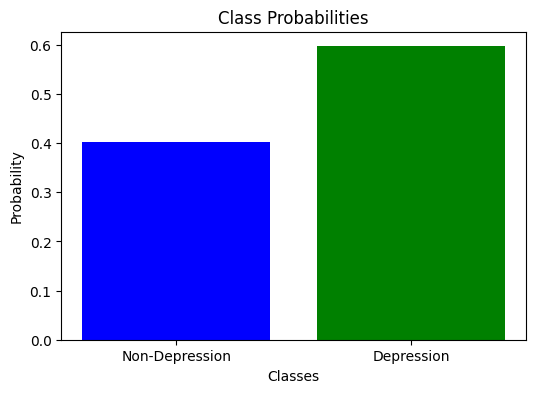

In [1148]:

# Example usage
predicted_class, probabilities, confidence = get_prediction_with_probabilities(loaded_model, processed_data)

print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {probabilities}")
print(f"Confidence: {confidence:.2f}")

# Plot the class probabilities
plot_class_probabilities(probabilities)

In [1156]:
import shap

# Create a SHAP explainer for the model
explainer = shap.TreeExplainer(loaded_model)

# Get SHAP values for the processed input data
shap_values = explainer.shap_values(processed_data)

# Check the structure of the shap_values object
print(f"SHAP Values Structure: {shap_values}")

# Wrap the shap_values[0][0] in a SHAP Explanation object
# For binary classification models, expected_value is a scalar, not a list
shap_values_instance = shap.Explanation(values=shap_values[0][0],
                                        base_values=explainer.expected_value,
                                        data=processed_data.iloc[0].values,
                                        feature_names=processed_data.columns)

# Visualize the SHAP values for the first instance
shap.initjs()  # Initialize JS for visualization in Jupyter notebooks
shap.force_plot(shap_values_instance)

SHAP Values Structure: [[-0.11928712 -0.10376795  0.05291837 -0.04525609 -0.01060001  0.15740809
   0.          0.0036329  -0.07671513]]


c:\Users\ggrys\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [1158]:
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
explainer = LimeTabularExplainer(processed_data.values, 
                                 training_labels=prediction,
                                 feature_names=processed_data.columns,
                                 class_names=['Class 0', 'Class 1'],
                                 mode='classification')

# Explain a prediction
exp = explainer.explain_instance(processed_data.iloc[0].values, 
                                 loaded_model.predict_proba, 
                                 num_features=5)

# Ensure the background color is white
plt.figure(facecolor='white')  # Set the figure's background color

# Visualize the explanation
exp.show_in_notebook()

<Figure size 640x480 with 0 Axes>